# Bestcard credit default prediction models

## Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,  plot_confusion_matrix
from sklearn.feature_selection import SelectKBest, mutual_info_classif


## Data Exploration

In [2]:
# Load the dataset
#df= pd.read_excel("C:/Users/User/Downloads/BestCard_data.xlsx")
df = pd.read_csv('C:\\Users\\skonda16\\Desktop\\DM\\Final\\BestCard_data.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,3047,5000,1000,0,high school,0,1,0,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,129,0,0,0,high school,0,1,0,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,4200,2000,3100,1,university,0,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1926,52964,1804,1,high school,0,1,0,0,0


In [3]:
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,0,0,0,0,1


In [4]:
# Check for missing values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
EDUCATION_CAT                 0
graduate school               0
high school                   0
none                          0
others                        0
university                    0
dtype: i

In [5]:
# Check for missing values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
EDUCATION_CAT                 0
graduate school               0
high school                   0
none                          0
others                        0
university                    0
dtype: i

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [7]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,none,others,university
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,...,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,167919.054905,1.603060,1.842334,1.556031,35.505213,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,...,5259.514964,4887.048717,4843.729973,5257.843047,0.221797,0.352985,0.164266,0.011214,0.004313,0.467222
std,129839.453081,0.489272,0.744661,0.521463,9.227442,1.126769,1.198640,1.199165,1.167897,1.131735,...,17265.439561,15956.349371,15311.721795,17635.468185,0.415463,0.477907,0.370524,0.105301,0.065532,0.498934
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,390.000000,294.750000,242.750000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1822.000000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4556.250000,4050.500000,4082.750000,4015.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,800000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,889043.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.columns.tolist()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'EDUCATION_CAT',
 'graduate school',
 'high school',
 'none',
 'others',
 'university']

In [9]:
df['default payment next month'].value_counts()

0    20750
1     5914
Name: default payment next month, dtype: int64

In [10]:
corr = df.corr()
corr

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,none,others,university
LIMIT_BAL,1.000000,0.027046,-0.232688,-0.111873,0.149157,-0.273396,-0.296471,-0.286613,-0.269296,-0.249555,...,0.207638,0.202795,0.218082,0.221305,-0.154423,0.260582,-0.139678,-0.002007,0.026224,-0.148892
SEX,0.027046,1.000000,0.014336,-0.031307,-0.088421,-0.058993,-0.070828,-0.067869,-0.060820,-0.055418,...,-0.011542,-0.000199,0.000081,-0.003342,-0.039945,-0.022777,-0.005669,0.005594,0.005437,0.024133
EDUCATION,-0.232688,0.014336,1.000000,-0.137097,0.179035,0.112653,0.129558,0.124114,0.118464,0.105290,...,-0.042349,-0.039319,-0.044946,-0.046859,0.034966,-0.835517,0.689244,0.308571,0.190703,0.198278
MARRIAGE,-0.111873,-0.031307,-0.137097,1.000000,-0.412828,0.019759,0.025096,0.034308,0.033082,0.036830,...,-0.003408,-0.014387,-0.000410,-0.009461,-0.026030,0.137198,-0.092283,-0.015199,0.006647,-0.060549
AGE,0.149157,-0.088421,0.179035,-0.412828,1.000000,-0.044277,-0.054053,-0.055795,-0.054972,-0.059438,...,0.029876,0.025307,0.020541,0.021640,0.014334,-0.096956,0.229301,0.017985,-0.013465,-0.079443
PAY_1,-0.273396,-0.058993,0.112653,0.019759,-0.044277,1.000000,0.675430,0.575617,0.539238,0.509140,...,-0.072682,-0.064112,-0.057021,-0.061031,0.325365,-0.142688,0.059008,-0.011596,-0.028421,0.099034
PAY_2,-0.296471,-0.070828,0.129558,0.025096,-0.054053,0.675430,1.000000,0.764960,0.659844,0.620211,...,-0.057972,-0.047047,-0.035798,-0.038711,0.263649,-0.169756,0.063009,-0.016974,-0.033740,0.123824
PAY_3,-0.286613,-0.067869,0.124114,0.034308,-0.055795,0.575617,0.764960,1.000000,0.776238,0.686325,...,-0.055098,-0.046136,-0.035672,-0.038332,0.238085,-0.161372,0.063176,-0.018969,-0.031364,0.115777
PAY_4,-0.269296,-0.060820,0.118464,0.033082,-0.054972,0.539238,0.659844,0.776238,1.000000,0.820401,...,-0.070528,-0.044948,-0.034297,-0.030607,0.219889,-0.154019,0.058468,-0.013638,-0.031913,0.111178
PAY_5,-0.249555,-0.055418,0.105290,0.036830,-0.059438,0.509140,0.620211,0.686325,0.820401,1.000000,...,0.010085,-0.057446,-0.033770,-0.026060,0.204948,-0.139655,0.049600,-0.013954,-0.028813,0.103665


Text(0.5, 1.0, 'Correlation Heatmap')

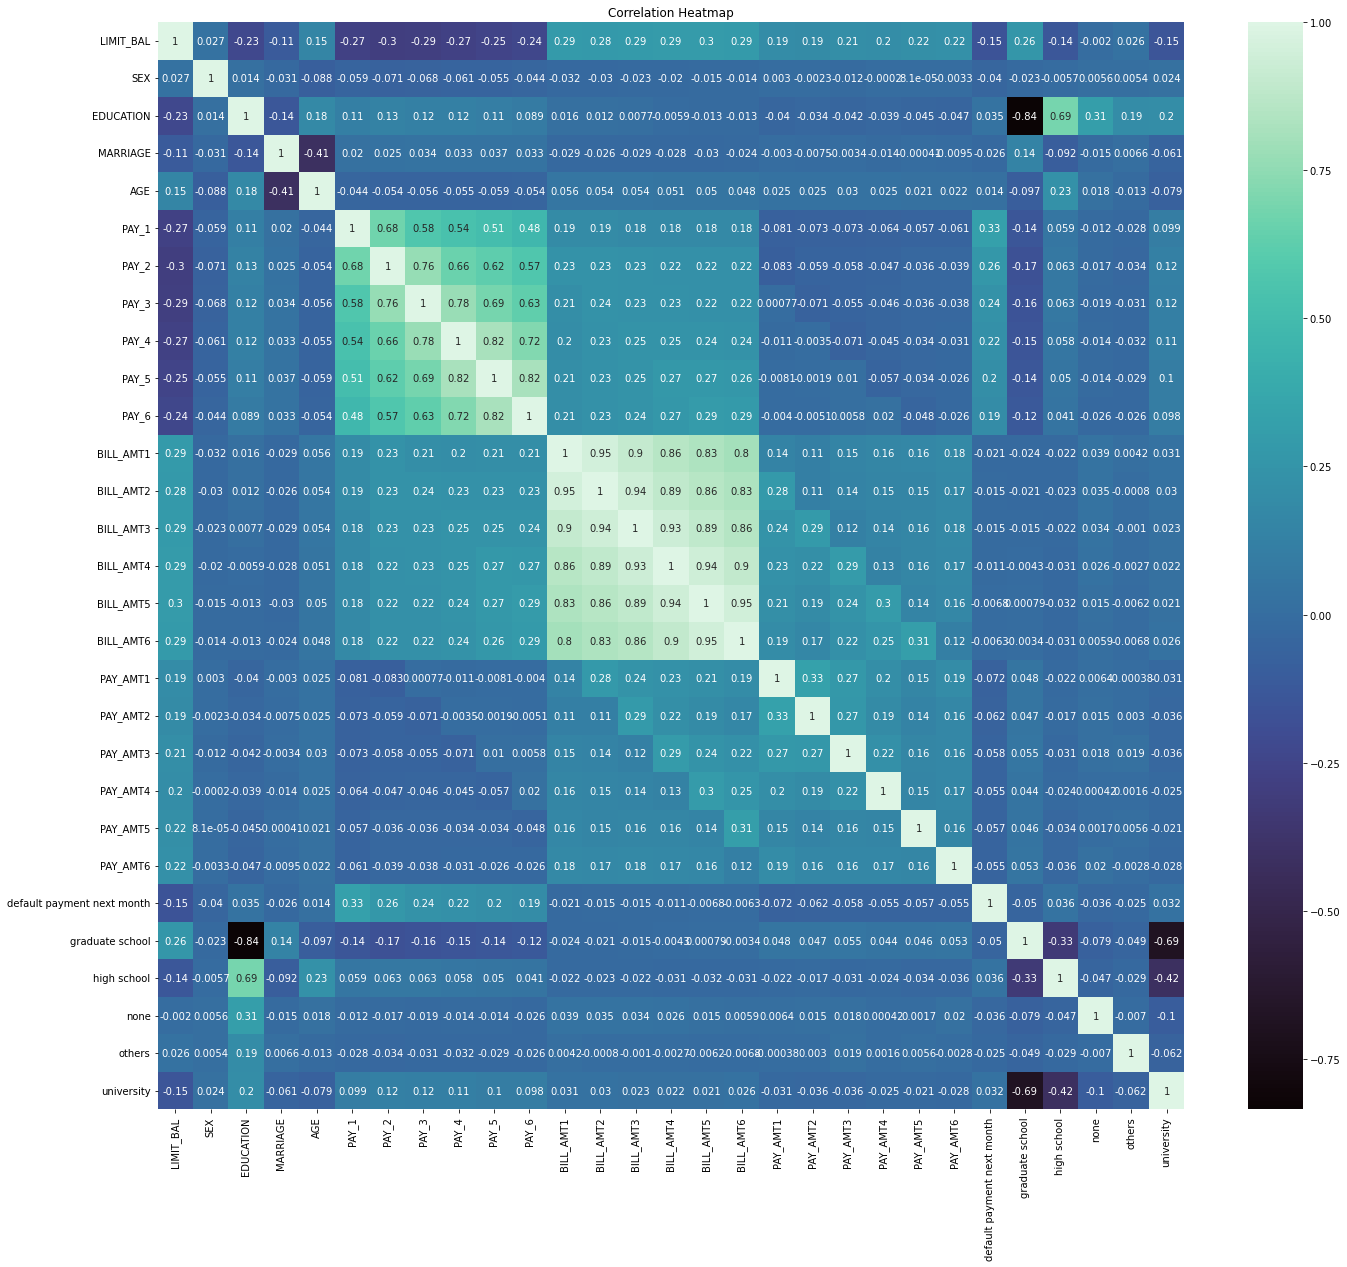

In [11]:
# Checking for correlations
fig, ax = plt.subplots(figsize=(23, 20))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='mako')
plt.title('Correlation Heatmap')

# Data Cleaning 

In [12]:
# Removing unnecessary columns
X = df.drop(["default payment next month","ID","EDUCATION_CAT","EDUCATION"], axis=1)
y = df["default payment next month"]

## Model building

## A - Gradient Boosting Classifier (Best model selected)

In [13]:
# Spliting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# Scale the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Defining the hyperparameters to tune
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [15]:
# Trained a random forest classifier but the accuracy was less compared to Gradient boosting classifier
#clf = RandomForestClassifier(n_estimators=100, random_state=0)
#clf.fit(X_train, y_train)

In [16]:
#Using gradient boosting classification
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

# Feature Importance

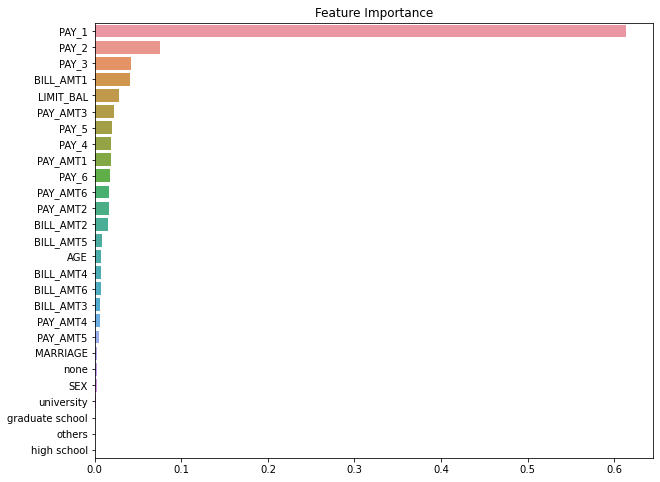

In [17]:
# Get the feature importance
importances = gb.feature_importances_
feature_names = X.columns

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10,8))
plt.title("Feature Importance")
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.show()

## Model Evaluation

C:\Users\skonda16\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy_test 0.8303018938683667
Accuracy_train 0.824480802587783
Precision: 0.6812297734627831
Recall: 0.3728963684676705
F1 score: 0.4819690898683457


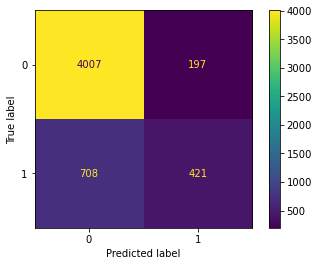

In [18]:
# Evaluation

y_pred_test = gb.predict(X_test)
y_pred_train = gb.predict(X_train)

accuracy_test = accuracy_score(y_test, y_pred_test) #accuracy for test data set
accuracy_train = accuracy_score(y_train, y_pred_train) #accuracy for trained data set
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
plot_confusion_matrix(gb, X_test, y_test)
print("Accuracy_test", accuracy_test)
print("Accuracy_train", accuracy_train)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


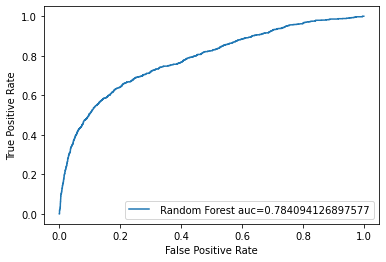

In [19]:
y_pred_proba = gb.predict_proba(X_test)[:,1] 
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba) 
auc = metrics.roc_auc_score(y_test, y_pred_proba) 
plt.plot(fpr,tpr,label=" Random Forest auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
#plt.legend(loc=4) 
# show the legend 
plt.legend() 
plt.show()

# B - Support Vector Machine 

In [20]:
#svm = SVC(kernel='linear', C=1, random_state=42)
#svm = SVC(kernel='poly', C=1, random_state=42)
svm = SVC() #default using Radial Basis Function
svm.fit(X_train, y_train)

SVC()

# Model Evaluation

In [ ]:
# Evaluation

y_pred_test = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

accuracy_test = accuracy_score(y_test, y_pred_test) #accuracy for test data set
accuracy_train = accuracy_score(y_train, y_pred_train) #accuracy for trained data set
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
plot_confusion_matrix(svm, X_test, y_test)

print("Accuracy_test", accuracy_test)
print("Accuracy_train", accuracy_train)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

# C - Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

In [ ]:
y_pred_test
y_pred_train

# Model Evaluation

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred_test) #accuracy for test data set
accuracy_train = accuracy_score(y_train, y_pred_train) #accuracy for trained data set
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
plot_confusion_matrix(svm, X_test, y_test)

print("Accuracy_test", accuracy_test)
print("Accuracy_train", accuracy_train)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[:,1] 
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba) 
auc = metrics.roc_auc_score(y_test, y_pred_proba) 
plt.plot(fpr,tpr,label=" Logistic Regression auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
#plt.legend(loc=4) 
# show the legend 
plt.legend() 
plt.show()

# D - KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

In [ ]:
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

# Model Evaluation

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred_test) #accuracy for test data set
accuracy_train = accuracy_score(y_train, y_pred_train) #accuracy for trained data set
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
plot_confusion_matrix(knn, X_test, y_test)

print("Accuracy_test", accuracy_test)
print("Accuracy_train", accuracy_train)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1] 
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba) 
auc = metrics.roc_auc_score(y_test, y_pred_proba) 
plt.plot(fpr,tpr,label=" KNN auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
#plt.legend(loc=4) 
# show the legend 
plt.legend() 
plt.show()